<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/EXPLORATORY/handling_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time-series basic handling

## Read time series data from excel


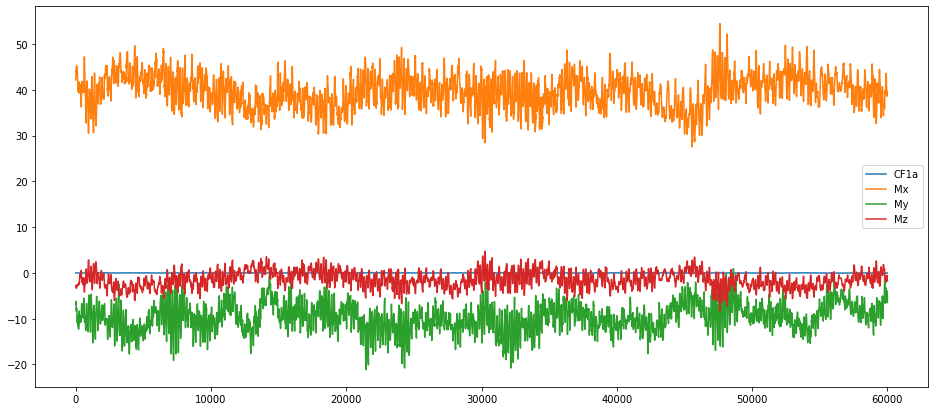

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('https://raw.githubusercontent.com/raulbenitez/TIME_SERIES/main/struct_data.txt', sep="\t", header=0)
data.columns = ["CF1a", "Mx", "My", "Mz"]
data.plot(figsize=(16,7))
plt.show()

In [2]:
data.head()

,CF1a,Mx,My,Mz
0,-0.039399,42.08768,-6.734489,-2.728385
1,-0.039766,42.08768,-6.647603,-2.814805
2,-0.040284,42.08768,-6.589679,-2.814805
3,-0.040895,42.26046,-6.531754,-2.872417
4,-0.041383,42.26046,-6.531754,-2.872417


In [3]:
data.describe()

,CF1a,Mx,My,Mz
count,60000.000000,60000.000000,60000.000000,60000.000000
mean,-0.016301,39.642687,-9.656331,-1.433570
std,0.017309,3.572852,3.089111,1.777064
min,-0.074374,27.516570,-21.099670,-8.403250
25%,-0.028169,37.105860,-11.629080,-2.670772
50%,-0.016358,39.783950,-9.688620,-1.489709
75%,-0.004852,42.174070,-7.603351,-0.193420
max,0.048921,54.441440,0.911496,4.732478


In [4]:
data.shape

(60000, 4)

In [5]:
print(data.shape)
print(data.dtypes)

(60000, 4)
CF1a    float64
Mx      float64
My      float64
Mz      float64
dtype: object


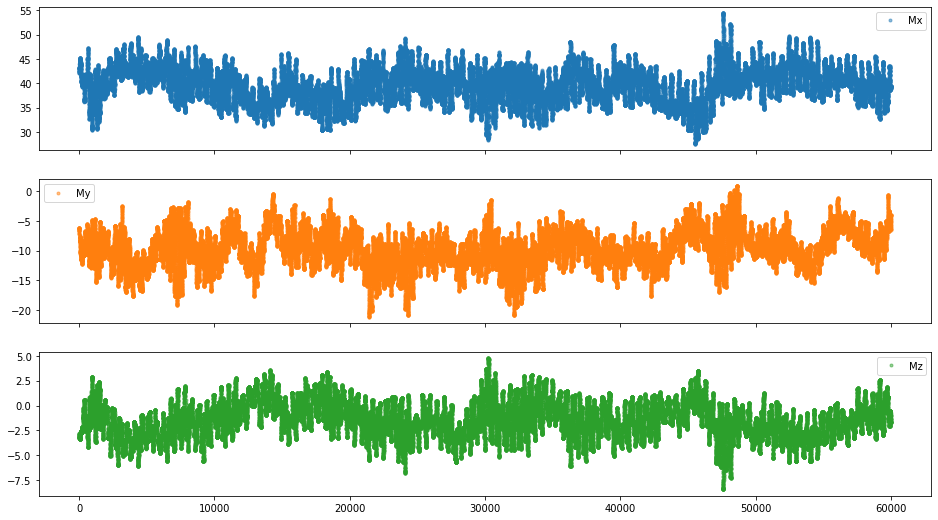

In [6]:
cols_plot = ['Mx', 'My', 'Mz']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 9), subplots=True)

Otras librerias de visualización🇰
seaborn https://seaborn.pydata.org/

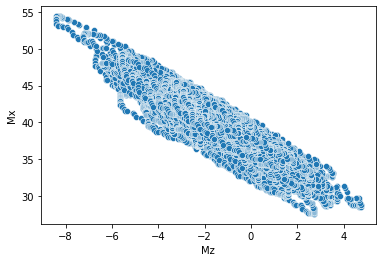

In [7]:
import seaborn as sns
sns.scatterplot(x='Mz',y='Mx',data=data)

## Scaling time-series

### Standardization
# $\hat{x} = \frac{x-\bar{x}}{\sigma_x}$

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler

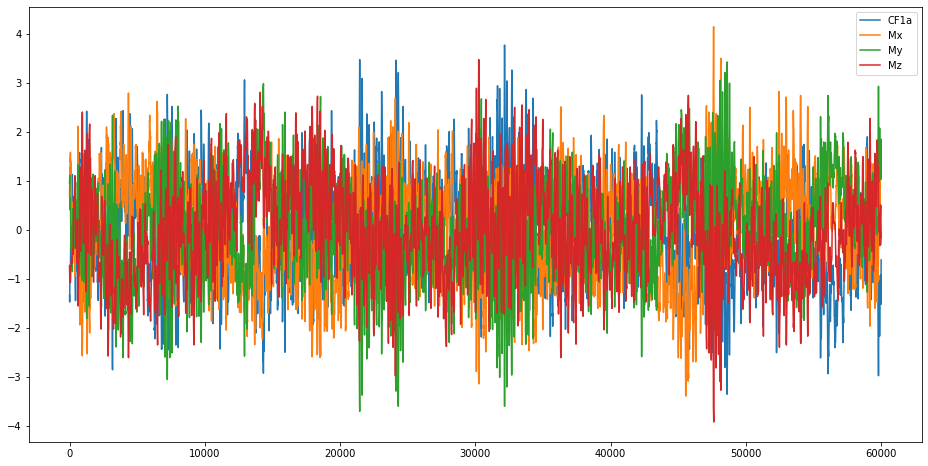

,CF1a,Mx,My,Mz
0,-1.334474,0.684331,0.945860,-0.728632
1,-1.355631,0.684331,0.973987,-0.777263
2,-1.385604,0.684331,0.992738,-0.777263
3,-1.420869,0.732691,1.011489,-0.809683
4,-1.449080,0.732691,1.011489,-0.809683


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dscal1 = scaler.fit_transform(data) # returns a numpy array 
data_scaled = pd.DataFrame(dscal1,columns = ["CF1a", "Mx", "My", "Mz"]) # convert the numpy array to pandas dataframe
data_scaled.plot(figsize=(16,8))
plt.show()
data_scaled.head()

### Normalization 

# $\tilde{x} = \frac{x-x_{min}}{x_{max}-x_{min}}$

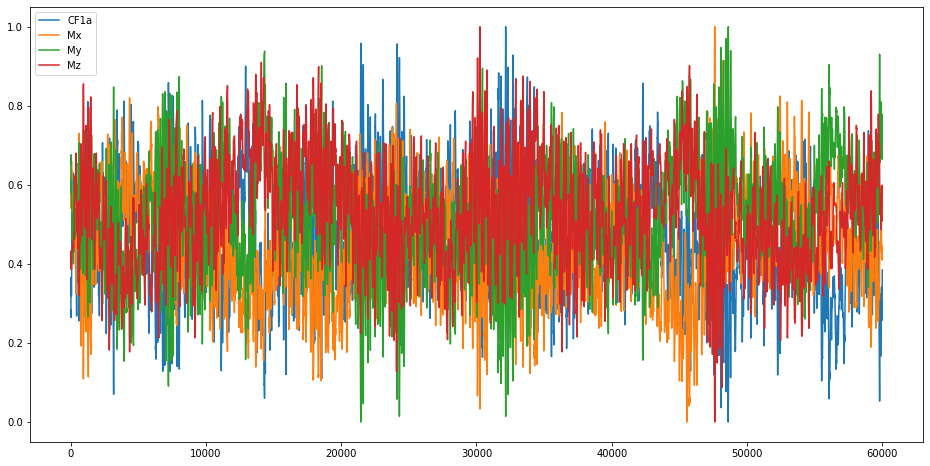

,CF1a,Mx,My,Mz
0,0.283663,0.541177,0.652632,0.432018
1,0.280693,0.541177,0.656579,0.425439
2,0.276485,0.541177,0.659210,0.425439
3,0.271535,0.547594,0.661842,0.421053
4,0.267574,0.547594,0.661842,0.421053


In [9]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
dscal2 = min_max_scaler.fit_transform(data)
data_norm = pd.DataFrame(dscal2,columns = ["CF1a", "Mx", "My", "Mz"])
data_norm.plot(figsize=(16,8))
plt.show()
data_norm.head()

### Scale data to specified range (min,max):

## $x_{scaled} = \tilde{x}(\text{max}-\text{min})+\text{min}$

where 

## $\tilde{x} = \frac{x-x_{min}}{x_{max}-x_{min}}$

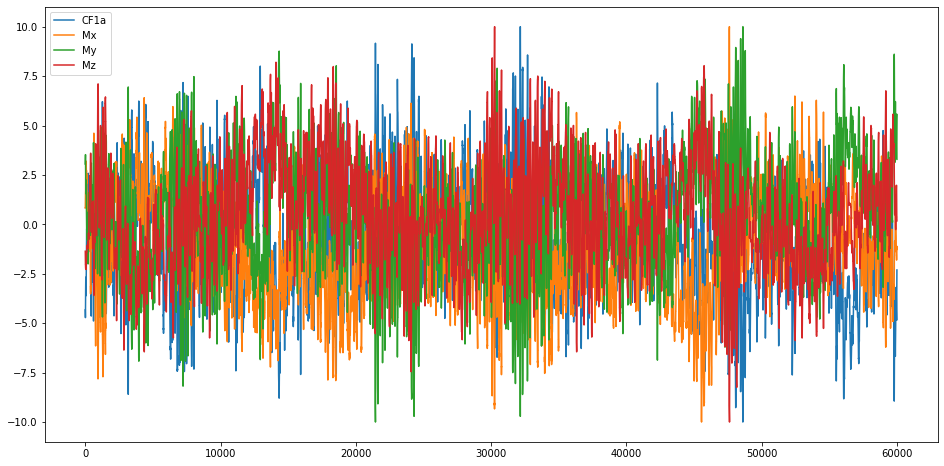

In [10]:
min_max_scaler2 = MinMaxScaler(feature_range=(-10, 10))
dscal3 = min_max_scaler2.fit_transform(data)
data_scal1 = pd.DataFrame(dscal3,columns = ["CF1a", "Mx", "My", "Mz"])
data_scal1.plot(figsize=(16,8))
plt.show()

### Scale data to range [-1,1]:

Scaled data lies within the range [-1, 1] by dividing through the largest maximum value in each time-series

In [11]:
max_abs_scaler = preprocessing.MaxAbsScaler()
dscal4 = max_abs_scaler.fit_transform(data)
data_scal2 = pd.DataFrame(dscal4,columns = ["CF1a", "Mx", "My", "Mz"])
data_scal2.plot(figsize=(16,8))
plt.show()

NameError: ignored

You can also return back to the original signal by applying the inverse transform

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
dscal2 = min_max_scaler.fit_transform(data)
back_to_original = min_max_scaler.inverse_transform(dscal2)

data_back = pd.DataFrame(back_to_original,columns = ["CF1a", "Mx", "My", "Mz"])
data_back.plot(figsize=(16,8))
plt.show()

## Dealing with date and timestamps: The Pandas Timestamp 

In [ ]:
import pandas as pd
pd.to_datetime('2018-01-15 3:45pm')

In [ ]:
pd.to_datetime(['4th of July, 2015','2015-Jul-6', '07-07-2015', '20150708'])

In [ ]:
pd.to_datetime('7/8/1952', dayfirst=True)

Generate a sequence of timestamps: 

Frequency codes:

D	Calendar day	
W	Weekly		
M	Month end	
Q	Quarter end	
A	Year end	
H	Hours	
T	Minutes		
S	Seconds		
L	Milliseonds		
U	Microseconds		
N	nanoseconds

In [ ]:
pd.date_range('2019-07-18', periods=10, freq='H')

In [12]:
pd.date_range('2019-07-18', periods=10, freq='M')

DatetimeIndex(['2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
               '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29',
               '2020-03-31', '2020-04-30'],
              dtype='datetime64[ns]', freq='M')

Assign a certain sequence to a previously loaded dataframe

In [13]:
data.index = pd.date_range('2010-07-18', periods=data.shape[0], freq='T')

In [14]:
data.head()

,CF1a,Mx,My,Mz
2010-07-18 00:00:00,-0.039399,42.08768,-6.734489,-2.728385
2010-07-18 00:01:00,-0.039766,42.08768,-6.647603,-2.814805
2010-07-18 00:02:00,-0.040284,42.08768,-6.589679,-2.814805
2010-07-18 00:03:00,-0.040895,42.26046,-6.531754,-2.872417
2010-07-18 00:04:00,-0.041383,42.26046,-6.531754,-2.872417


In [15]:
data.tail()

,CF1a,Mx,My,Mz
2010-08-28 15:55:00,-0.029145,39.40959,-6.068361,-1.691354
2010-08-28 15:56:00,-0.028443,39.32320,-6.300058,-1.691354
2010-08-28 15:57:00,-0.028108,39.29440,-6.329020,-1.691354
2010-08-28 15:58:00,-0.027589,39.29440,-6.415906,-1.691354
2010-08-28 15:59:00,-0.026948,39.29440,-6.473830,-1.720160


Now the visualization tools use the index to plot data:

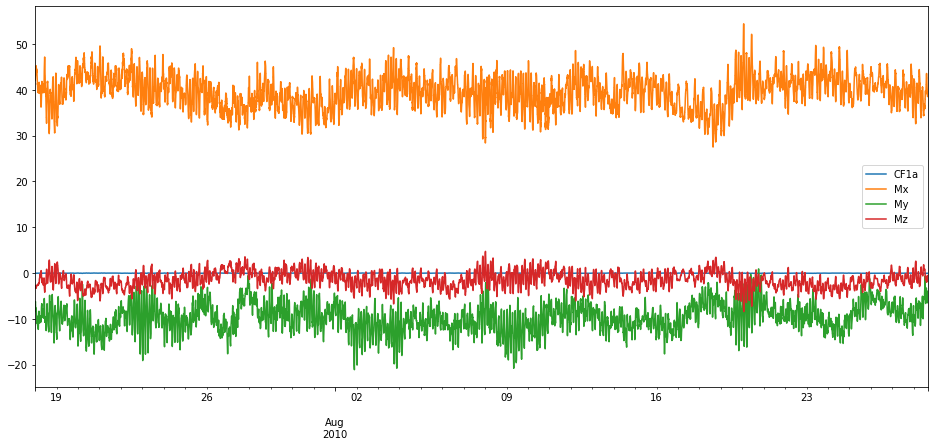

In [16]:
data.plot(figsize=(16,7))
plt.show()

Filtrar datos en un rango de fechas:

In [17]:
import datetime 
data_filtered = data.loc[datetime.date(year=2010,month=7,day=20):datetime.date(year=2010,month=7,day=23)]
data_filtered.head()

,CF1a,Mx,My,Mz
2010-07-20 00:00:00,0.010773,43.78668,-15.39415,-4.831254
2010-07-20 00:01:00,0.010224,43.58511,-15.33622,-4.802448
2010-07-20 00:02:00,0.009613,43.58511,-15.01764,-4.802448
2010-07-20 00:03:00,0.009003,43.26834,-14.95972,-4.571996
2010-07-20 00:04:00,0.008332,43.26834,-14.72802,-4.571996


In [18]:
data_filtered.shape

(4321, 4)

You can construct consistent datetime index from different columns:

https://omniweb.gsfc.nasa.gov/

https://spdf.gsfc.nasa.gov/pub/data/omni/low_res_omni/

- columns 1, 2, 3 giving the year, day of year (DOY), and hour of day of each measurement
- column 40: the sunspot number (R) - the number of spots on the surface of the Sun, indicating how active it is
- column 41: the Dst index - an hourly magnetic activity index measured at Earth’s surface, in nT
- column 51: the F10.7 index - the radio flux at 10.7cm (i.e. how bright the Sun is at that wavelength), in “solar flux units” (sfu)
    

In [19]:
import pandas as pd
df = pd.read_csv("https://spdf.gsfc.nasa.gov/pub/data/omni/low_res_omni/omni2_all_years.dat",delim_whitespace=True,usecols=[0, 1, 2, 39, 40, 50],names=["Year", "DOY", "Hour", "R", "Dst", "F10.7"])
df.head()

,Year,DOY,Hour,R,Dst,F10.7
0,1963,1,0,33,-6,999.9
1,1963,1,1,33,-5,999.9
2,1963,1,2,33,-5,999.9
3,1963,1,3,33,-3,999.9
4,1963,1,4,33,-3,999.9


In [20]:
df.index = pd.to_datetime(df["Year"] * 100000 + df["DOY"] * 100 + df["Hour"], format="%Y%j%H")
df = df.drop(columns=["Year", "DOY", "Hour"])
df.head()

,R,Dst,F10.7
1963-01-01 00:00:00,33,-6,999.9
1963-01-01 01:00:00,33,-5,999.9
1963-01-01 02:00:00,33,-5,999.9
1963-01-01 03:00:00,33,-3,999.9
1963-01-01 04:00:00,33,-3,999.9


## Resampling, moving averages and differencing

**Resampling a time series: Moving average, Downsampling, Smoothing:**

Sampling was every minute and we want to smooth/downsample at every two days by median filtering


In [21]:
data_smoothed = data[["Mx", "My"]].resample("2d").median()
data_smoothed.head()

,Mx,My
2010-07-18,40.33108,-9.645176
2010-07-20,42.57722,-12.237280
2010-07-22,41.71332,-8.559099
2010-07-24,40.28789,-9.775506
2010-07-26,36.44353,-9.659657


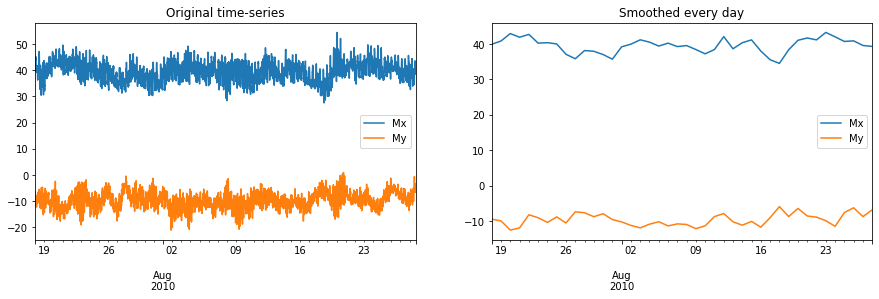

In [22]:
fig = plt.figure(figsize=(12, 9))
ax1 = fig.add_subplot(121)
data[["Mx", "My"]].plot(figsize=(15,4),ax=ax1)
ax1.set_title("Original time-series")

ax2 = fig.add_subplot(122)
data[["Mx", "My"]].resample("1d").median().plot(figsize=(15,4),ax=ax2)
ax2.set_title("Smoothed every day")
plt.show()

In [23]:
data['Mxs'] = data[["Mx"]].resample("1d").median()
data.head(20)

,CF1a,Mx,My,Mz,Mxs
2010-07-18 00:00:00,-0.039399,42.08768,-6.734489,-2.728385,39.95673
2010-07-18 00:01:00,-0.039766,42.08768,-6.647603,-2.814805,NaN
2010-07-18 00:02:00,-0.040284,42.08768,-6.589679,-2.814805,NaN
2010-07-18 00:03:00,-0.040895,42.26046,-6.531754,-2.872417,NaN
2010-07-18 00:04:00,-0.041383,42.26046,-6.531754,-2.872417,NaN
2010-07-18 00:05:00,-0.041658,42.46204,-6.415906,-2.901224,NaN
2010-07-18 00:06:00,-0.041719,42.49083,-6.415906,-2.930030,NaN
2010-07-18 00:07:00,-0.041780,42.51963,-6.300058,-2.958837,NaN
2010-07-18 00:08:00,-0.041810,42.54842,-6.271096,-2.987643,NaN
2010-07-18 00:09:00,-0.041810,42.57722,-6.242134,-3.045256,NaN


In [24]:
data = data.drop(columns=["Mxs"])
data.head()

,CF1a,Mx,My,Mz
2010-07-18 00:00:00,-0.039399,42.08768,-6.734489,-2.728385
2010-07-18 00:01:00,-0.039766,42.08768,-6.647603,-2.814805
2010-07-18 00:02:00,-0.040284,42.08768,-6.589679,-2.814805
2010-07-18 00:03:00,-0.040895,42.26046,-6.531754,-2.872417
2010-07-18 00:04:00,-0.041383,42.26046,-6.531754,-2.872417


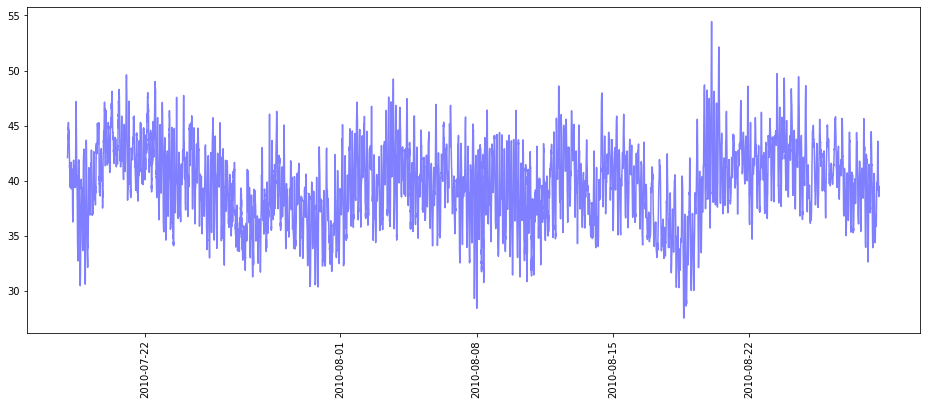

In [25]:
fig = plt.figure(figsize=(16, 6))
plt.plot(data.index.values, data['Mx'], alpha=0.5, color = 'blue')
plt.xticks(rotation='vertical')
plt.show()